<a href="https://colab.research.google.com/github/skhetpal/Trust-in-the-US-government-by-Voters-or-Nonvoters/blob/main/Trust_in_Voters_and_Nonvoters_in_the_Government_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/non-voters/nonvoters_data.csv')

In [3]:
df.shape

(5836, 119)

In [4]:
df.head()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q9_1,Q9_2,Q9_3,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27_1,Q27_2,Q27_3,Q27_4,Q27_5,Q27_6,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29_1,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,2,4,2,1,1,4,4,3,2,2,1,2,2,2,2,1,2,1,3,4,2,1,1,1,1,2,4,2,2,4,...,1,NaN,2,1,1,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,1,1,3,3,3,4,3,3,2,2,2,2,3,3,1,1,2,2,2,3,2,2,2,2,3,2,2,1,1,3,...,1,NaN,1,3,3,1,1,1,1,1,1,1,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,1,4,3,2,2,3,3,2,2,2,2,3,3,2,3,1,1,1,3,2,1,1,2,2,2,2,1,1,2,4,...,1,NaN,2,1,2,1,1,1,1,1,1,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,1,1,2,1,1,4,4,2,1,1,2,2,2,2,2,1,3,1,3,2,2,2,2,2,2,2,2,1,2,4,...,1,NaN,2,1,2,1,1,1,1,1,1,1,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,1,1,1,4,-1,1,1,2,4,1,1,1,1,1,1,1,2,2,1,3,2,3,3,3,4,2,2,1,4,3,...,1,NaN,1,3,1,1,1,1,1,1,1,1,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


In [5]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
style.use('fivethirtyeight')

In [7]:
# Q8 is 'How much would you say you trust each of the following?'
# Q26 is 'In general, which of the following categories do you think best describes you?'
viz_col = ['Q8_1','Q8_2','Q8_3','Q8_4','Q8_5','Q8_6','Q8_7','Q8_8','Q8_9','Q26']

df_viz = df[viz_col]

In [8]:
df_viz.head()

,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q26
0,3,4,2,1,1,1,1,2,4,1
1,2,3,2,2,2,2,3,2,2,1
2,3,2,1,1,2,2,2,2,1,1
3,3,2,2,2,2,2,2,2,2,1
4,1,3,2,3,3,3,4,2,2,1


In [9]:
for col in viz_col:
  print(col, '\n', df_viz[col].value_counts(), '\n')

Q8_1 
  4    2185
 2    1563
 3    1093
 1     948
-1      47
Name: Q8_1, dtype: int64 

Q8_2 
  3    2354
 2    2000
 4    1205
 1     228
-1      49
Name: Q8_2, dtype: int64 

Q8_3 
  2    3187
 3    1140
 1    1075
 4     392
-1      42
Name: Q8_3, dtype: int64 

Q8_4 
  2    2648
 1    1744
 3     977
 4     433
-1      34
Name: Q8_4, dtype: int64 

Q8_5 
  2    2634
 3    1864
 4     748
 1     541
-1      49
Name: Q8_5, dtype: int64 

Q8_6 
  2    2890
 3    1304
 1    1038
 4     578
-1      26
Name: Q8_6, dtype: int64 

Q8_7 
  2    2012
 4    1767
 3    1598
 1     417
-1      42
Name: Q8_7, dtype: int64 

Q8_8 
  2    2643
 1    1813
 3     885
 4     466
-1      29
Name: Q8_8, dtype: int64 

Q8_9 
  2    2695
 1    2157
 3     713
 4     234
-1      37
Name: Q8_9, dtype: int64 

Q26 
  1    4469
 4     509
 2     492
 3     341
-1      25
Name: Q26, dtype: int64 



In [10]:
#renaming columns to make them more intuitive
df_viz.rename({'Q8_1':'Presidency',
               'Q8_2':'Congress',
               'Q8_3':'Supreme_Court',
               'Q8_4':'CDC',
               'Q8_5':'Election_officials',
               'Q8_6':'FBI/CIA',
               'Q8_7':'News_Media',
               'Q8_8':'Police',
               'Q8_9':'USPS',
               'Q26':'Voting_Habits'},
              axis = 1,
              inplace = True)   

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
#Right now 1 is 'A lot' and 4 is 'Not at all'. To me that doesn't make as much sense intuitively as the reverse, so I'm flipping the scale and then making the minimum value 0 instead of 1
value_dict = {1:3,
              2:2,
              3:1,
              4:0,
             -1:np.nan}

In [12]:
for col in df_viz.columns[0:9].to_list():
  df_viz[col] = df_viz[col].replace(value_dict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
voting_habits_dict = {1:'Almost Always Vote',
                      2:'Sometimes Vote',
                      3:'Rarely or Never Vote',   # 3 was rarely vote and 4 was never vote but FiveThirtyEight chose to combine these in these visualizations so I'm electing to do the same
                      4:'Rarely or Never Vote',
                     -1:np.nan}

df_viz['Voting_Habits'].replace(voting_habits_dict, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [14]:
df_viz.head(10)

,Presidency,Congress,Supreme_Court,CDC,Election_officials,FBI/CIA,News_Media,Police,USPS,Voting_Habits
0,1.0,0.0,2.0,3.0,3.0,3.0,3.0,2.0,0.0,Almost Always Vote
1,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,Almost Always Vote
2,1.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,Almost Always Vote
3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Almost Always Vote
4,3.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,2.0,Almost Always Vote
5,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,Rarely or Never Vote
6,2.0,NaN,2.0,3.0,3.0,3.0,2.0,3.0,2.0,Almost Always Vote
7,0.0,0.0,3.0,3.0,2.0,2.0,0.0,3.0,3.0,Almost Always Vote
8,1.0,0.0,1.0,2.0,2.0,2.0,0.0,2.0,2.0,Almost Always Vote
9,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,Almost Always Vote


In [15]:
# comparing to original column values to make sure inverting the scale worked
df[viz_col].head(10)

,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q26
0,3,4,2,1,1,1,1,2,4,1
1,2,3,2,2,2,2,3,2,2,1
2,3,2,1,1,2,2,2,2,1,1
3,3,2,2,2,2,2,2,2,2,1
4,1,3,2,3,3,3,4,2,2,1
5,3,3,3,2,3,3,2,2,2,4
6,2,-1,2,1,1,1,2,1,2,1
7,4,4,1,1,2,2,4,1,1,1
8,3,4,3,2,2,2,4,2,2,1
9,2,3,2,2,2,2,2,1,2,1


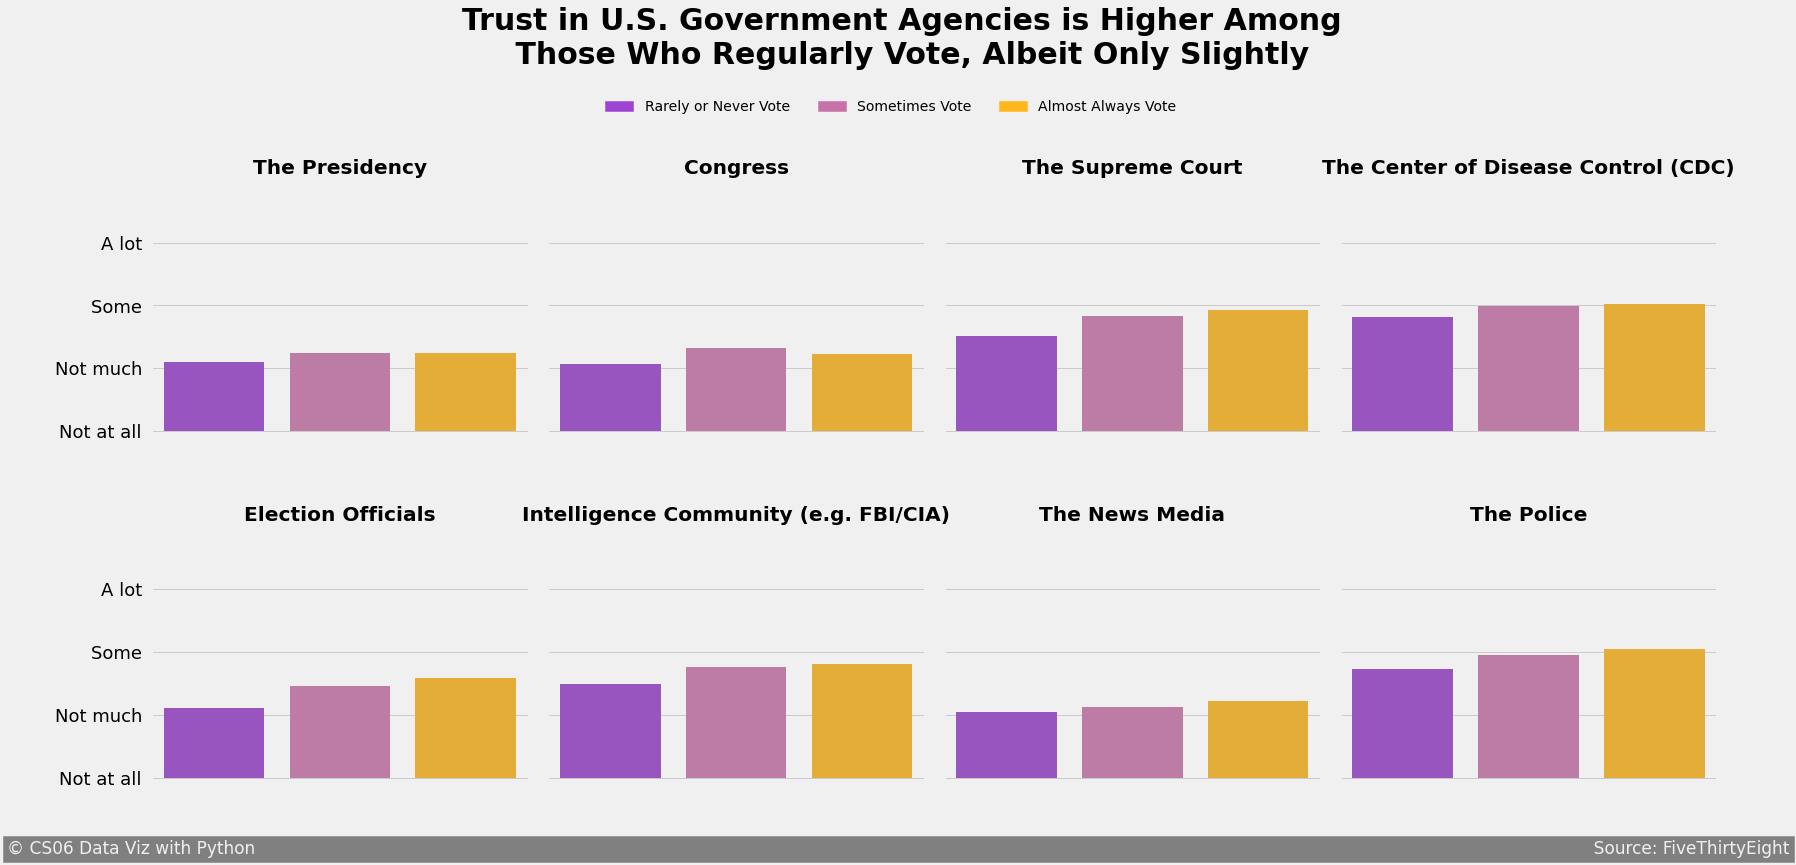

In [16]:
#creating figure with 2 rows of 4 subplots that share their x and y axes
fig, axes = plt.subplots(2, 4, sharex = True, sharey = True, figsize = (25,12))

#dictionary for subplot titles
title_dict = {'Presidency':'The Presidency',
              'Congress':'Congress',
              'Supreme_Court':'The Supreme Court',
              'CDC':'The Center of Disease Control (CDC)',
              'Election_officials':'Election Officials',
              'FBI/CIA':'Intelligence Community (e.g. FBI/CIA)',
              'News_Media':'The News Media',
              'Police':'The Police',
              'USPS':'US Postal Service'}

#writing function to create subplots
def create_subplot(a,b,i):
  bar = sns.barplot(ax = axes[a, b],
                    x = 'Voting_Habits',
                    y = df_viz.columns[i],
                    data = df_viz,
                    order = ['Rarely or Never Vote','Sometimes Vote','Almost Always Vote'],
                    palette = {'Rarely or Never Vote':'#9d43d1',
                               'Sometimes Vote':'#c771a9',
                               'Almost Always Vote':'#ffb71c'},
                    ci = None)
  
  #setting title
  bar.set_title(title_dict[df_viz.columns[i]], fontweight = 'bold')

  #making x axis invisible
  bar.get_xaxis().set_visible(False)

  #removing y axis label
  bar.set_ylabel('')

  #tick parameters
  bar.tick_params(axis='both', which='major', labelsize=18)

  #setting limits, ticks and tick labels for y axis
  bar.set_ylim((-0.25,4))
  bar.set_yticks(np.arange(0,4,1))
  bar.set_yticklabels(labels=['Not at all ', 'Not much ','Some ','A lot '])

  return bar

#creating subplots
ax1 = create_subplot(0,0,0)
ax2 = create_subplot(0,1,1)
ax3 = create_subplot(0,2,2)
ax4 = create_subplot(0,3,3)
ax5 = create_subplot(1,0,4)
ax6 = create_subplot(1,1,5)
ax7 = create_subplot(1,2,6)
ax8 = create_subplot(1,3,7)

#adjusting positioning
fig.subplots_adjust(top = 0.78,   #position of top edge of subplots as fraction of figure height
                    wspace = 0.05, #width of padding between subplots as fraction of the average axes width
                    hspace = 0.3)  #height of padding between subplots as fraction of the average axes height

#adding title
fig.suptitle('Trust in U.S. Government Agencies is Higher Among \n Those Who Regularly Vote, Albeit Only Slightly', fontsize = 30, fontweight = 'bold', ha = 'center')

#adding signature bar, padding with whitespace to get it to extend across the entire figure
fig.text(x=0,
         y=0,
         s="""© CS06 Data Viz with Python                                                                                                             """
         + """                                                                                                                                            """
         + """Source: FiveThirtyEight""",
         fontsize=17,
         color='#f0f0f0',
         backgroundcolor='grey')

#creating patches for legend
rarely = mpatches.Patch(color = '#9d43d1', label = 'Rarely or Never Vote')
sometimes = mpatches.Patch(color = '#c771a9', label = 'Sometimes Vote')
always = mpatches.Patch(color = '#ffb71c', label = 'Almost Always Vote')

#adding legend to figure
fig.legend(handles = [rarely, sometimes, always], 
           loc = 'upper center',
           bbox_to_anchor = (0.47, 0.85,0.05,0.05), # x, y, box width, box height
           frameon = False,
           ncol = 3)

plt.xlabel('')
plt.show()